<a href="https://colab.research.google.com/github/Muhammad-Abdullah-Jami/UK_Bank_Stocks_Prediction/blob/main/Yfinance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Installation of essential Libraries**

In [1]:
!pip install yfinance


**Importing Libraries**

In [95]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import xgboost as xgb
from sklearn.svm import SVR
import torch
from torch import nn

# Standard Chartered (STAN.L)

**Data Loading and preprocessing**

In [70]:
# Fetching data for Standard Chartered (STAN.L)
ticker = "STAN.L"
df = yf.download(ticker, start="2019-01-01", end="2024-01-01")

# Date index in datetime formatfor graph
df.index = pd.to_datetime(df.index)
df.head()

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,STAN.L,STAN.L,STAN.L,STAN.L,STAN.L,STAN.L
Date,,,,,,
2019-01-02 00:00:00+00:00,501.606323,606.400024,607.700012,584.099976,596.000000,4442051
2019-01-03 00:00:00+00:00,485.310577,586.700012,610.799988,582.700012,596.599976,7359146
2019-01-04 00:00:00+00:00,502.764282,607.799988,611.200012,596.000000,597.400024,7283237
2019-01-07 00:00:00+00:00,491.845398,594.599976,609.599976,590.900024,606.900024,7184535
2019-01-08 00:00:00+00:00,507.065643,613.000000,623.500000,593.599976,596.799988,7575939


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1261 entries, 2019-01-02 00:00:00+00:00 to 2023-12-29 00:00:00+00:00
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   (Adj Close, STAN.L)  1261 non-null   float64
 1   (Close, STAN.L)      1261 non-null   float64
 2   (High, STAN.L)       1261 non-null   float64
 3   (Low, STAN.L)        1261 non-null   float64
 4   (Open, STAN.L)       1261 non-null   float64
 5   (Volume, STAN.L)     1261 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 69.0 KB


In [46]:
df.describe()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,STAN.L,STAN.L,STAN.L,STAN.L,STAN.L,STAN.L
count,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1.261000e+03
mean,512.525411,567.990634,575.304779,560.508252,567.368439,7.753292e+06
std,104.083527,111.144439,111.080875,110.804058,110.558282,3.894145e+06
min,299.323364,336.799988,346.862000,334.250000,340.700012,6.793360e+05
25%,419.479309,466.100006,473.700012,459.200012,465.700012,5.175427e+06
50%,521.905273,585.599976,593.000000,578.599976,586.799988,6.721285e+06
75%,590.401428,661.000000,667.200012,654.200012,659.599976,9.140959e+06
max,750.497864,790.799988,799.400024,784.400024,790.400024,3.080891e+07


In [47]:
df.isnull().sum()

,,0
Price,Ticker,
Adj Close,STAN.L,0
Close,STAN.L,0
High,STAN.L,0
Low,STAN.L,0
Open,STAN.L,0
Volume,STAN.L,0


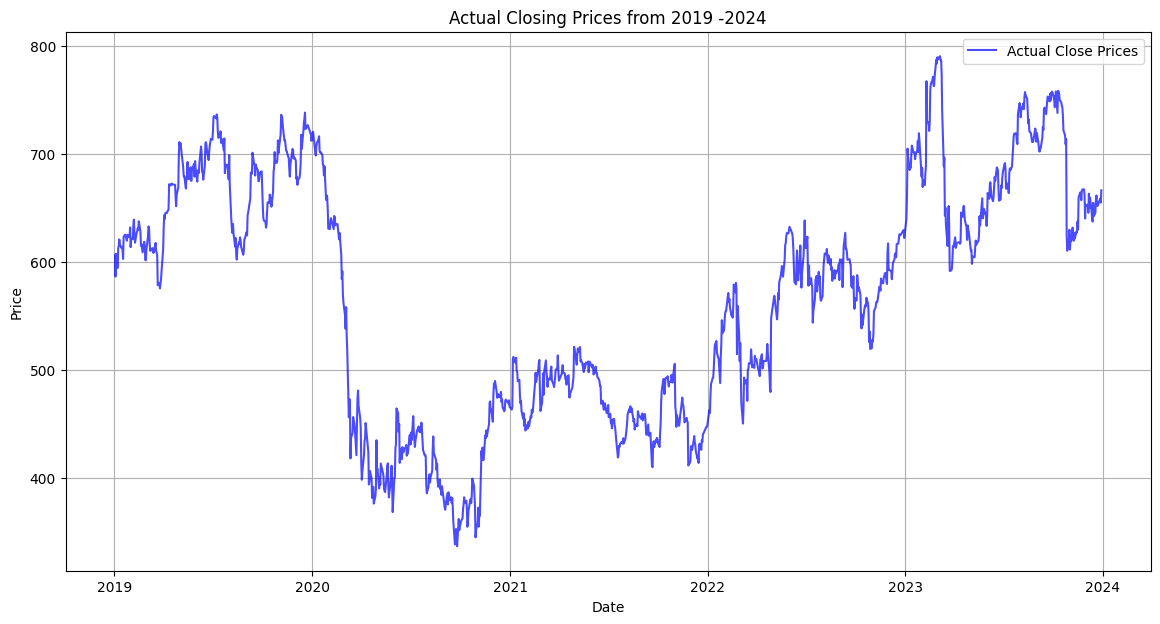

In [74]:
df.reset_index(inplace=True)
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df.set_index('Date', inplace=True)

plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Close'], label='Actual Close Prices', color='blue', alpha=0.7)

# Adding titles and labels
plt.title("Actual Closing Prices from 2019 -2024")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()


**Feature Engineering**

In [76]:
# Testing feature engineering code

# window size and alpha for moving averages
window_size = 20  # 20-day SMA
alpha = 0.5

df['CMA_Close'] = df['Close'].expanding().mean()
df['SMA_Close'] = df['Close'].rolling(window=window_size).mean()
df['EMA_Close'] = df['Close'].ewm(alpha=alpha, min_periods=window_size).mean()


**Plotiing the Feature Engineering**

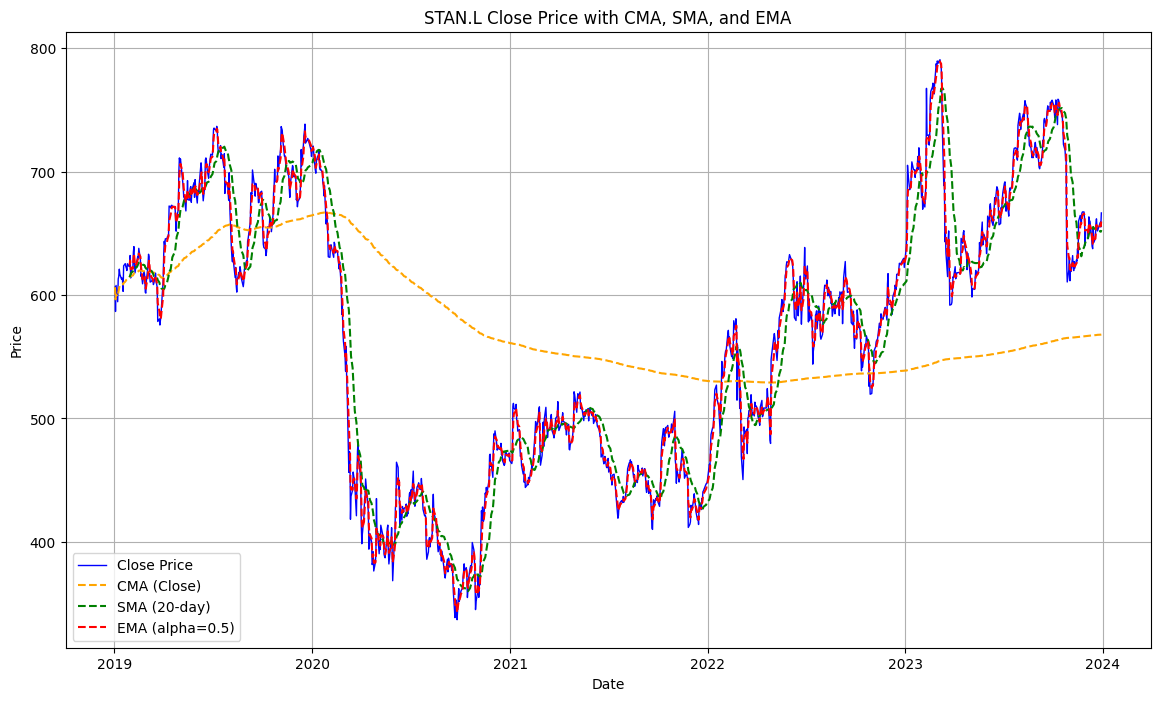

In [77]:
# Plotting Close prices along with CMA, SMA, and EMA
plt.figure(figsize=(14, 8))

plt.plot(df.index, df['Close'], label='Close Price', color='blue', linewidth=1)
plt.plot(df.index, df['CMA_Close'], label='CMA (Close)', color='orange', linestyle='--')
plt.plot(df.index, df['SMA_Close'], label=f'SMA ({window_size}-day)', color='green', linestyle='--')
plt.plot(df.index, df['EMA_Close'], label=f'EMA (alpha={alpha})', color='red', linestyle='--')

plt.title('STAN.L Close Price with CMA, SMA, and EMA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)


plt.show()

## Random Forest Rregessor and classifier

**Random Forest**

In [78]:
df.index = pd.to_datetime(df.index)
future_data.columns = X.columns
# for binary classification: 1 if the price goes up, 0 if it goes down
df['Target'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)
df = df.iloc[:-1]
X = df[['Open', 'High', 'Low', 'Close', 'Volume']]
y = df['Target']
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Random Forest model training
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

future_dates = pd.date_range(start=df.index[-1] + pd.DateOffset(days=1), periods=12, freq='M')
future_data = pd.DataFrame(index=future_dates, columns=X.columns)
for col in X.columns:
    future_data[col] = df[col].iloc[-1]

# storing prediction for year 2025
future_predictions_1y = rf_model.predict(future_data)

# Evaluation
y_pred = rf_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)


print("Model Performance Metrics")
print("-" * 30)
print(f"Mean Squared Error (MSE):       {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE):      {mae:.4f}")
print("-" * 30)


Model Performance Metrics
------------------------------
Mean Squared Error (MSE):       0.2875
Root Mean Squared Error (RMSE): 0.5362
Mean Absolute Error (MAE):      0.4986
------------------------------


<ipython-input-78-f6c2546c9a49>:14: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(start=df.index[-1] + pd.DateOffset(days=1), periods=12, freq='M')


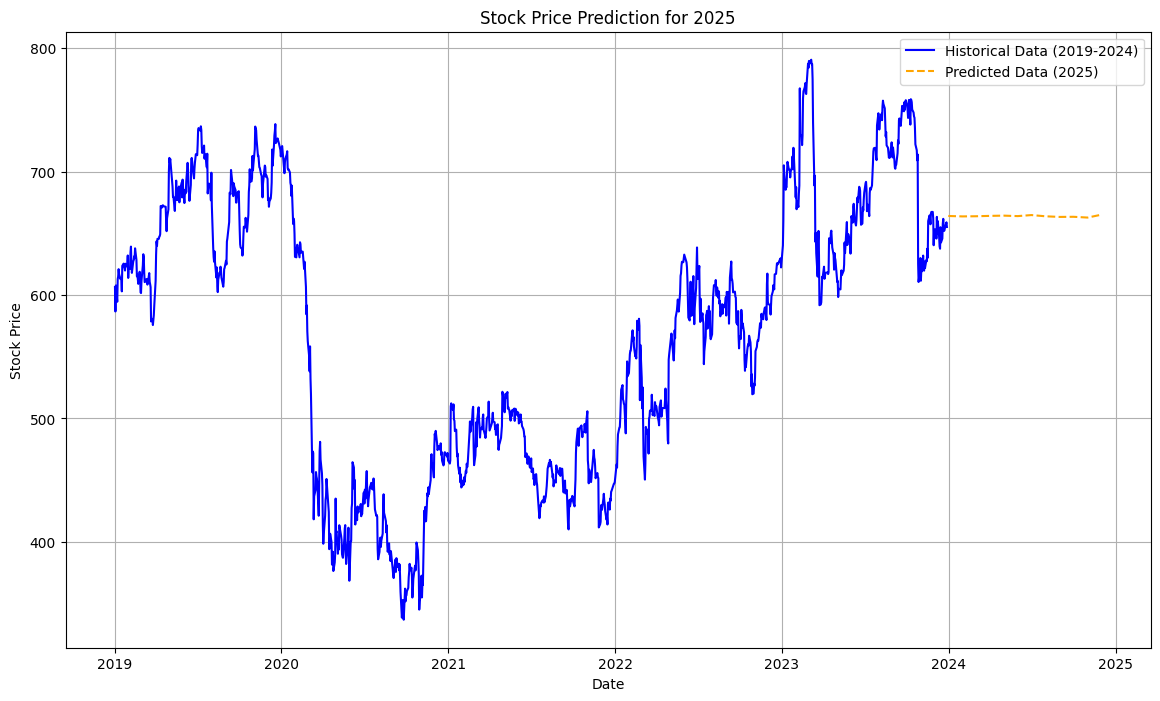

In [79]:

# Ploting the origanal historical (2019-2024) and the predicted (2025) data
plt.figure(figsize=(14, 8))
plt.plot(df.index, df['Close'], label='Historical Data (2019-2024)', color='blue')
plt.plot(predicted_2025.index, predicted_2025['Close'], label='Predicted Data (2025)', color='orange', linestyle='--')

plt.title('Stock Price Prediction for 2025')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.show()


**Experiment with hyperparameters**

In [98]:
df.index = pd.to_datetime(df.index)
future_data.columns = X.columns
# for binary classification: 1 if the price goes up, 0 if it goes down
df['Target'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)
df = df.iloc[:-1]
X = df[['Open', 'High', 'Low', 'Close', 'Volume']]
y = df['Target']
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Random Forest model training
rf_model = RandomForestRegressor(n_estimators=50, random_state=42)
rf_model.fit(X_train, y_train)

future_dates = pd.date_range(start=df.index[-1] + pd.DateOffset(days=1), periods=12, freq='M')
future_data = pd.DataFrame(index=future_dates, columns=X.columns)
for col in X.columns:
    future_data[col] = df[col].iloc[-1]

# storing prediction for year 2025
future_predictions_1y = rf_model.predict(future_data)

# Evaluation
y_pred = rf_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)


print("Model Performance Metrics")
print("-" * 30)
print(f"Mean Squared Error (MSE):       {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE):      {mae:.4f}")
print("-" * 30)


Model Performance Metrics
------------------------------
Mean Squared Error (MSE):       0.2969
Root Mean Squared Error (RMSE): 0.5449
Mean Absolute Error (MAE):      0.5057
------------------------------


<ipython-input-98-9928d716eca1>:14: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(start=df.index[-1] + pd.DateOffset(days=1), periods=12, freq='M')


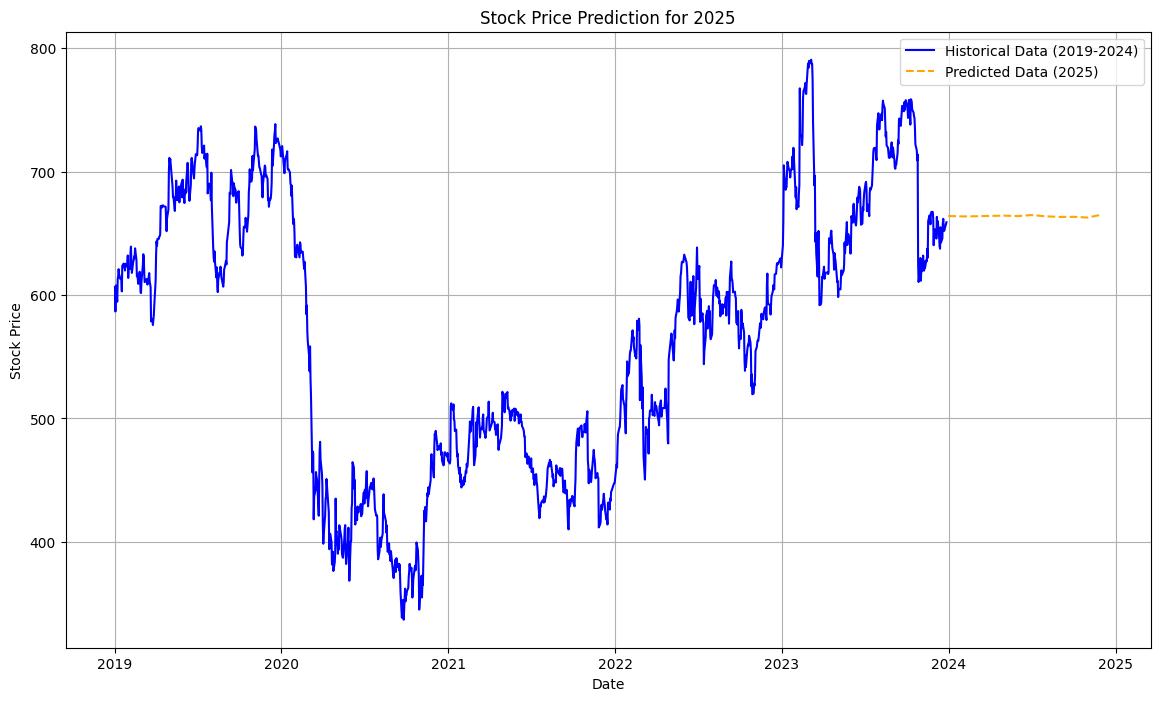

In [99]:

# Ploting the origanal historical (2019-2024) and the predicted (2025) data
plt.figure(figsize=(14, 8))
plt.plot(df.index, df['Close'], label='Historical Data (2019-2024)', color='blue')
plt.plot(predicted_2025.index, predicted_2025['Close'], label='Predicted Data (2025)', color='orange', linestyle='--')

plt.title('Stock Price Prediction for 2025')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.show()


**Using random forest classifier to just predict weather it goes up ir down**

Accuracy: 0.5436507936507936
The stock price is predicted to go DOWN.
Columns in df_combined: Index([('Close', 'STAN.L'), 'Predicted'], dtype='object')


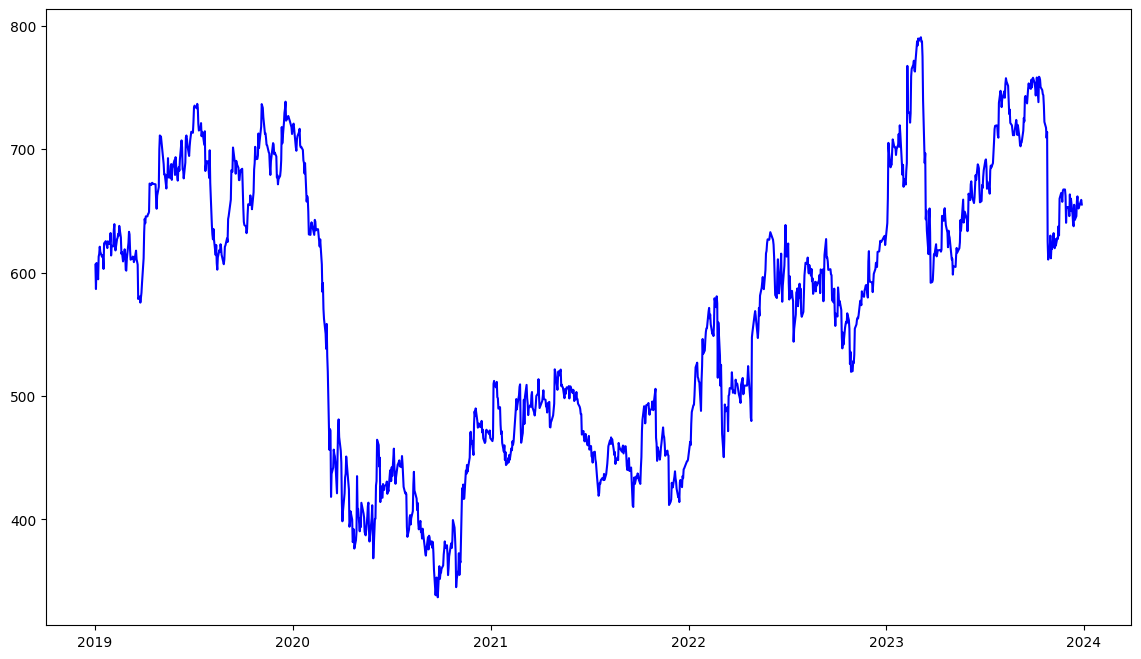

In [82]:
df['Target'] = np.where(df[('Close', 'STAN.L')].shift(-1) > df[('Close', 'STAN.L')], 1, 0)
X = df[['CMA_Close', 'SMA_Close', 'EMA_Close']].iloc[:-1]
y = df['Target'].iloc[:-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest classifier training
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Prediction for the next day
next_day_data = X.iloc[-1].values.reshape(1, -1)
next_day_prediction = rf_classifier.predict(next_day_data)

if next_day_prediction == 1:
    print("The stock price is predicted to go UP.")
else:
    print("The stock price is predicted to go DOWN.")

# Prediction for the next year
future_dates = pd.date_range(start=df.index[-1] + pd.DateOffset(days=1), periods=365, freq='D')
future_predictions = pd.DataFrame(index=future_dates, columns=['Predicted_Trend'])

last_known_values = X.iloc[-1].copy()

# consective prediction for the next year
for i in range(len(future_dates)):
    future_predictions.iloc[i] = rf_classifier.predict(last_known_values.values.reshape(1, -1))

    last_known_values['CMA_Close'] += 0.5 * (1 if future_predictions.iloc[i]['Predicted_Trend'] == 1 else -0.5)
    last_known_values['SMA_Close'] += 0.5 * (1 if future_predictions.iloc[i]['Predicted_Trend'] == 1 else -0.5)
    last_known_values['EMA_Close'] += 0.5 * (1 if future_predictions.iloc[i]['Predicted_Trend'] == 1 else -0.5)


df_combined = pd.concat([df[[('Close', 'STAN.L')]], future_predictions.rename(columns={'Predicted_Trend': 'Predicted'})], axis=1)
print("Columns in df_combined:", df_combined.columns)

# DataFrame for predicted trends
if ('Close', 'STAN.L') in df_combined.columns:
    df_combined['Predicted_Price'] = df_combined[('Close', 'STAN.L')] + (df_combined['Predicted'].shift(1) * 0.5)
else:
    print("Column 'Close' is missing in df_combined.")

plt.figure(figsize=(14, 8))
plt.plot(df.index, df[('Close', 'STAN.L')], label='Historical Data (2019-2024)', color='blue')

Accuracy: 0.5396825396825397
F1 Score: 0.5394795650543683


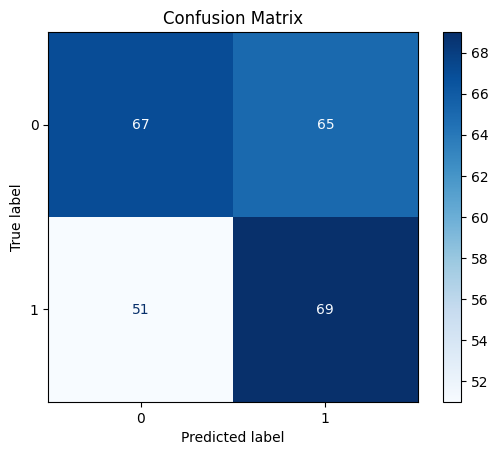

In [69]:
# creating bins for the continue and discreate data seprations for plottinh
bins = np.linspace(y_test.min(), y_test.max(), 10)

y_test_binned = np.digitize(y_test, bins)
y_pred_binned = np.digitize(y_pred, bins)

# Calculating the  accuracy  and F1 score from binned values
accuracy = accuracy_score(y_test_binned, y_pred_binned)
f1 = f1_score(y_test_binned, y_pred_binned, average='weighted')

print(f'Accuracy: {accuracy}')
print(f'F1 Score: {f1}')

# Confusion Matrix
cm = confusion_matrix(y_test_binned, y_pred_binned)

# Ploting the Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


## LSTM

In [85]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df['Close'].values.reshape(-1, 1))

# Create a function to prepare the data for LSTM
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        a = data[i:(i + time_step), 0]
        X.append(a)
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

# Setting the time step
time_step = 60  # 60 days look back
X, y = create_dataset(scaled_data, time_step)

# Reshape input to be [samples, time steps, features] which is required for LSTM
X = X.reshape(X.shape[0], X.shape[1], 1)

# Splitting the data into training and testing datasets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Building the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))

# Compiling the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Training the model
model.fit(X_train, y_train, epochs=50, batch_size=32)


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 54ms/step - loss: 0.0971
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 0.0091
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0063
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0060
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step - loss: 0.0060
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 70ms/step - loss: 0.0054
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 0.0053
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 0.0050
Epoch 9/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 0.0049
Epoch 10/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 0.0047
Epoch 11/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0047
Epoch 12/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 80ms/step - loss: 0.0044
Epoch 13/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 0.0039
Epoch 14/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 0.0043
Epoch 15/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 0.0037
Epoch 16/50
30/

8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 104ms/step


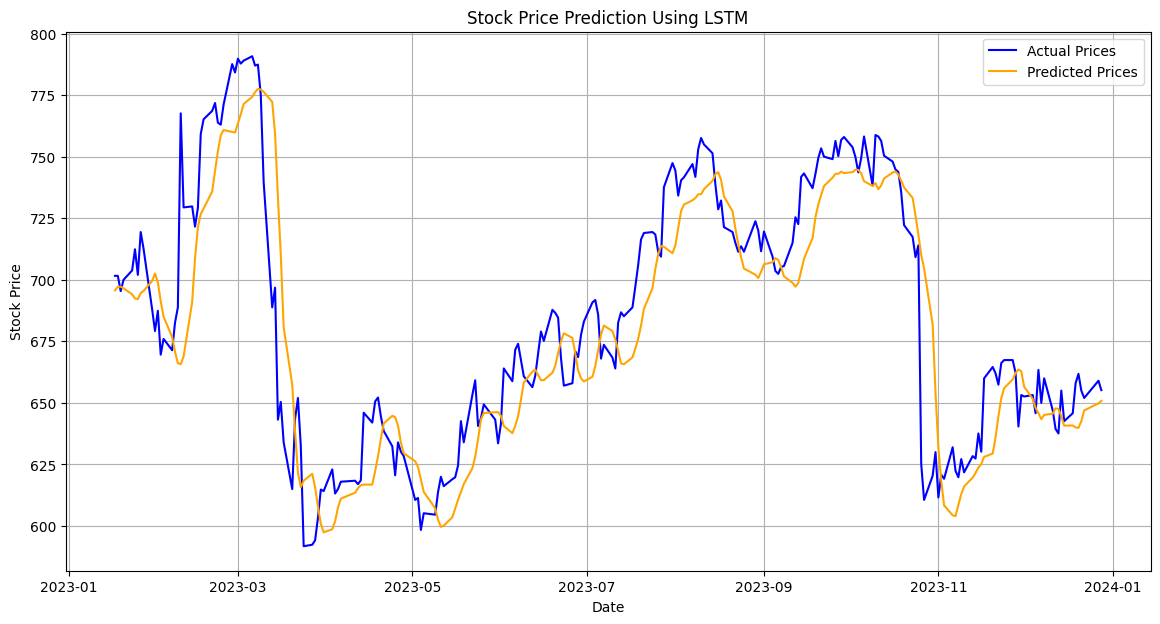

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━

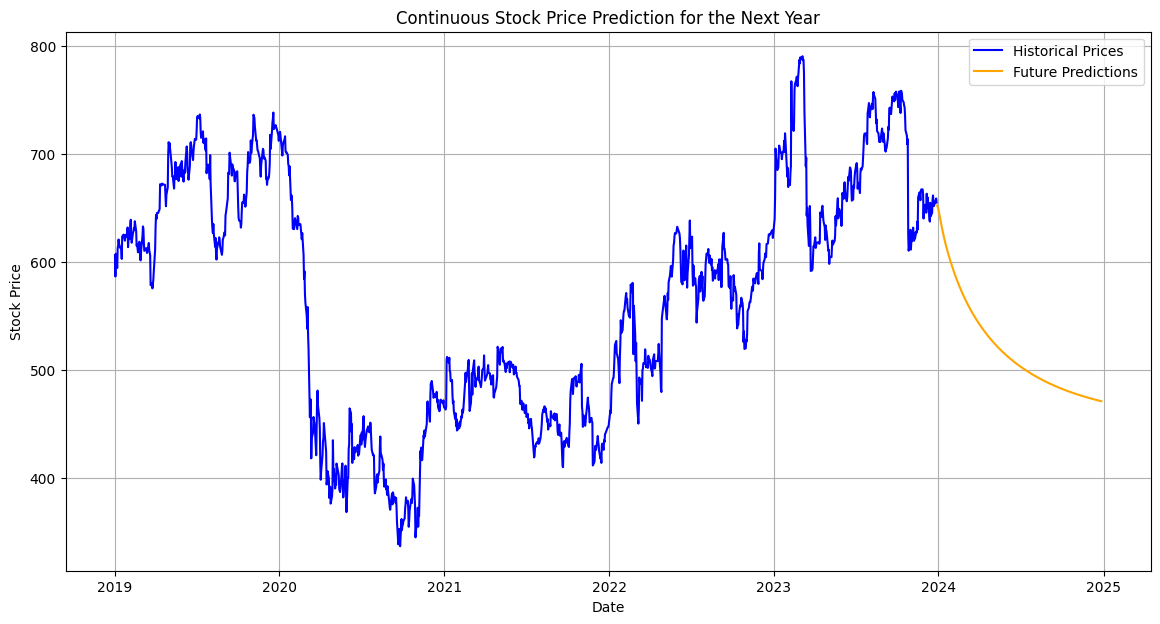

In [86]:
# Making predictions
predicted_prices = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted_prices)  # Rescale to original prices

# Prepare to plot
plt.figure(figsize=(14, 7))

# Plotting actual vs predicted prices
plt.plot(df.index[train_size + time_step + 1:], df['Close'][train_size + time_step + 1:], label='Actual Prices', color='blue')
plt.plot(df.index[train_size + time_step + 1:], predicted_prices, label='Predicted Prices', color='orange')

# Adding titles and labels
plt.title('Stock Price Prediction Using LSTM')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.show()

# Making continuous predictions for the next year
future_steps = 365  # Predicting for the next year
last_data = scaled_data[-time_step:].reshape(1, time_step, 1)

future_predictions = []

for _ in range(future_steps):
    predicted_price = model.predict(last_data)
    future_predictions.append(predicted_price[0, 0])

    # Update last_data for the next prediction
    last_data = np.append(last_data[:, 1:, :], predicted_price.reshape(1, 1, 1), axis=1)

# Prepare the index for future dates
last_date = df.index[-1]
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=future_steps)

# Create a DataFrame for future predictions
future_prices = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))
future_df = pd.DataFrame(data=future_prices, index=future_dates, columns=['Predicted Price'])

# Plotting future predictions
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Close'], label='Historical Prices', color='blue')
plt.plot(future_df.index, future_df['Predicted Price'], label='Future Predictions', color='orange')

# Adding titles and labels
plt.title('Continuous Stock Price Prediction for the Next Year')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.show()


**Experiment with hyperparameters**

In [100]:
# Hyperparameters
FEATURE_RANGE = (0, 1)
TIME_STEP = 60  # Look-back period in days
LSTM_UNITS = 100  # Number of LSTM units
DROPOUT_RATE = 0.3  # Dropout rate
EPOCHS = 100  # Number of epochs for training
BATCH_SIZE = 16  # Batch size for training

# Scaling the data
scaler = MinMaxScaler(feature_range=FEATURE_RANGE)
scaled_data = scaler.fit_transform(df['Close'].values.reshape(-1, 1))

# Function to prepare the data for LSTM
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        a = data[i:(i + time_step), 0]
        X.append(a)
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

# Prepare the dataset
X, y = create_dataset(scaled_data, TIME_STEP)

# Reshape input to be [samples, time steps, features] required for LSTM
X = X.reshape(X.shape[0], X.shape[1], 1)

# Split data into training and testing datasets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build the LSTM model
model = Sequential()
model.add(LSTM(LSTM_UNITS, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(DROPOUT_RATE))
model.add(LSTM(LSTM_UNITS, return_sequences=False))
model.add(Dropout(DROPOUT_RATE))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 8s 79ms/step - loss: 0.0480
Epoch 2/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - loss: 0.0046
Epoch 3/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 75ms/step - loss: 0.0042
Epoch 4/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 71ms/step - loss: 0.0045
Epoch 5/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 78ms/step - loss: 0.0042
Epoch 6/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 8s 126ms/step - loss: 0.0041
Epoch 7/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 8s 84ms/step - loss: 0.0038
Epoch 8/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 91ms/step - loss: 0.0036
Epoch 9/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - loss: 0.0029
Epoch 10/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - loss: 0.0033
Epoch 11/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 86ms/step - loss: 0.0034
Epoch 12/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 70ms/step - loss: 0.0032
Epoch 13/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 66ms/step - loss: 0.0030
Epoch 14/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step - loss: 0.0037
Epoch 15/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - loss: 0.0029


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 192ms/step


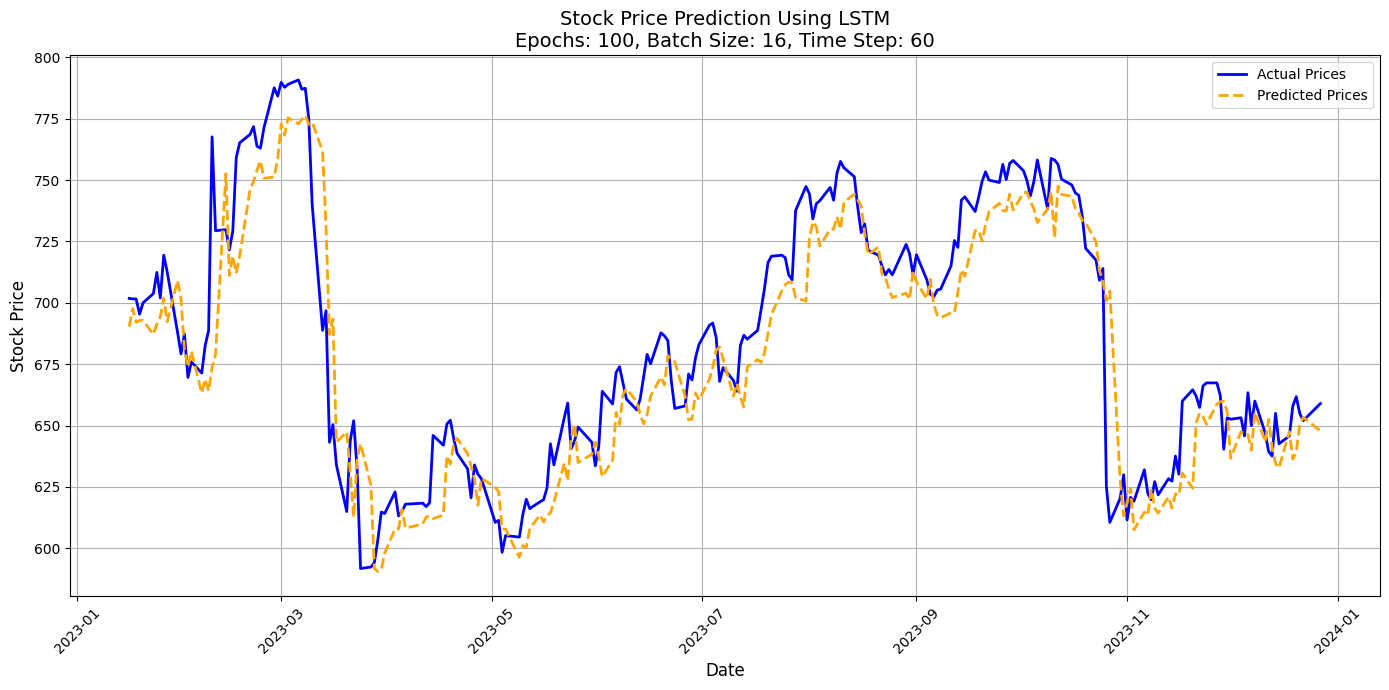

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━

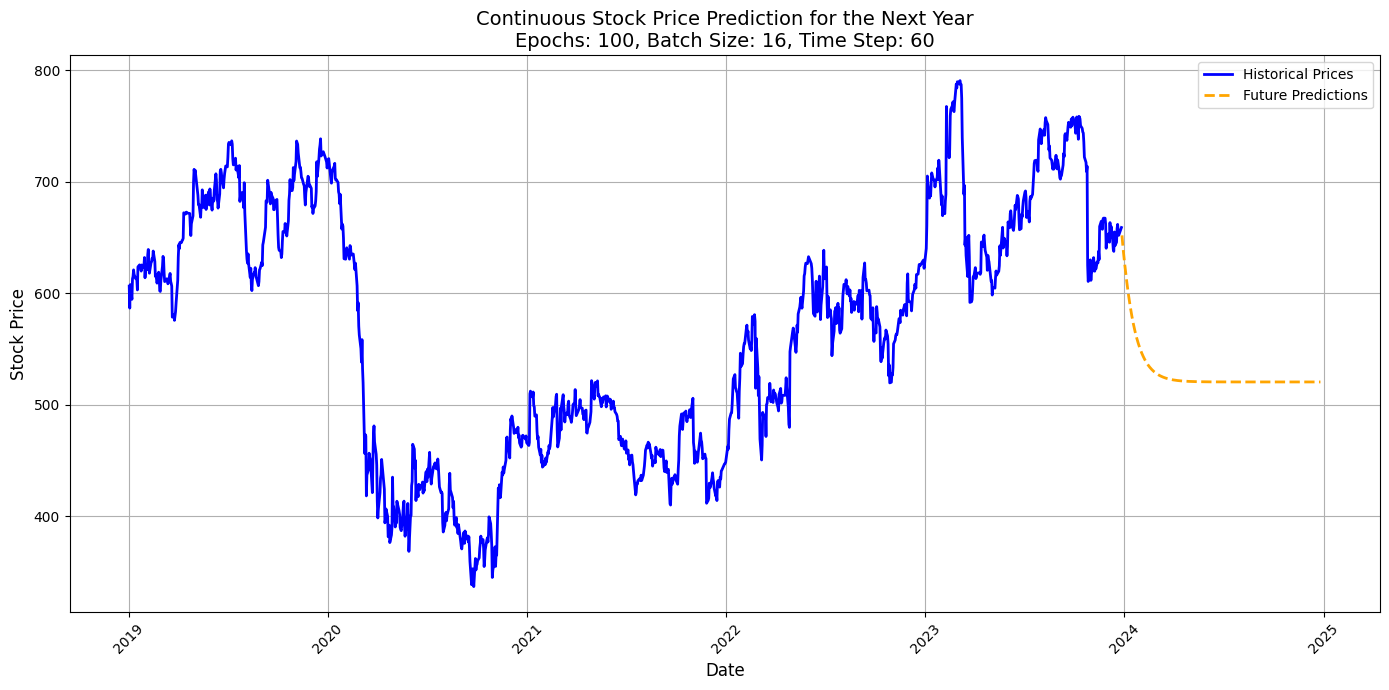

In [101]:
predicted_prices = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted_prices)
plt.figure(figsize=(14, 7))

# Plotting actual vs predicted prices
plt.plot(df.index[train_size + TIME_STEP + 1:], df['Close'][train_size + TIME_STEP + 1:],
         label='Actual Prices', color='blue', linewidth=2)
plt.plot(df.index[train_size + TIME_STEP + 1:], predicted_prices,
         label='Predicted Prices', color='orange', linestyle='--', linewidth=2)

# Adding titles and labels
plt.title('Stock Price Prediction Using LSTM\n'
          f'Epochs: {EPOCHS}, Batch Size: {BATCH_SIZE}, Time Step: {TIME_STEP}', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Stock Price', fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Making continuous predictions for the next year
future_steps = 365  # Predicting for the next year
last_data = scaled_data[-TIME_STEP:].reshape(1, TIME_STEP, 1)

future_predictions = []

for _ in range(future_steps):
    predicted_price = model.predict(last_data)
    future_predictions.append(predicted_price[0, 0])

    # Update last_data for the next prediction
    last_data = np.append(last_data[:, 1:, :], predicted_price.reshape(1, 1, 1), axis=1)

# Prepare the index for future dates
last_date = df.index[-1]
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=future_steps)

# Create a DataFrame for future predictions
future_prices = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))
future_df = pd.DataFrame(data=future_prices, index=future_dates, columns=['Predicted Price'])

# Plotting future predictions
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Close'], label='Historical Prices', color='blue', linewidth=2)
plt.plot(future_df.index, future_df['Predicted Price'], label='Future Predictions', color='orange', linestyle='--', linewidth=2)

# Adding titles and labels
plt.title('Continuous Stock Price Prediction for the Next Year\n'
          f'Epochs: {EPOCHS}, Batch Size: {BATCH_SIZE}, Time Step: {TIME_STEP}', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Stock Price', fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## XGBoost

In [89]:
data = df[['Close']].copy()

# Feature Engineering: Create lag features for the closing price
for i in range(1, 6):  # Creating 5 lag features
    data[f'lag_{i}'] = data['Close'].shift(i)

# Dropping missing values
data.dropna(inplace=True)

# Splitting the data into features (X) and target (y)
X = data.drop('Close', axis=1)
y = data['Close']

# Splitting the data into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the XGBoost model
xg_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=5)
xg_model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

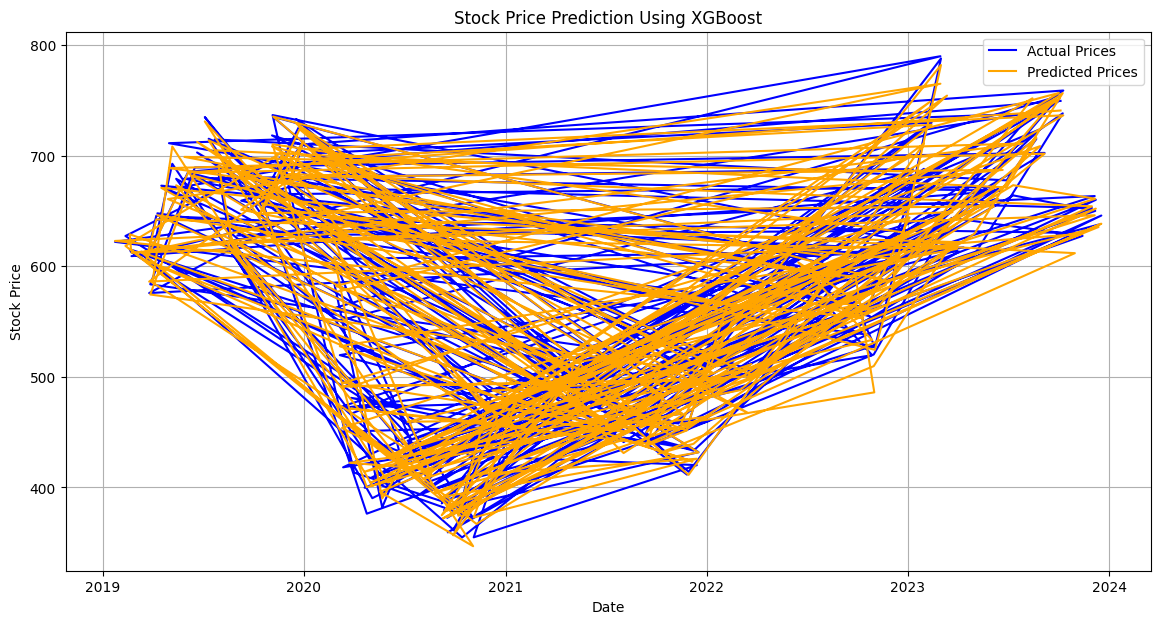

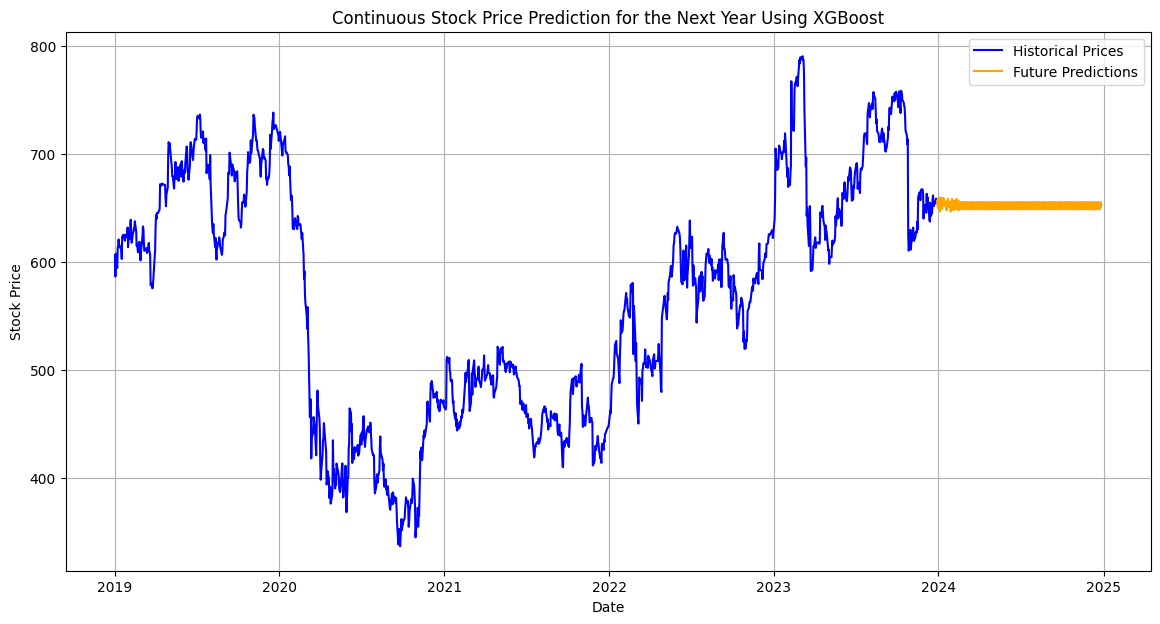

In [91]:
y_pred = xg_model.predict(X_test)

# Plotting actual vs predicted prices
plt.figure(figsize=(14, 7))
plt.plot(y_test.index, y_test, label='Actual Prices', color='blue')
plt.plot(y_test.index, y_pred, label='Predicted Prices', color='orange')

# Adding titles and labels
plt.title('Stock Price Prediction Using XGBoost')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.show()

# Continuous prediction for the next year
# Preparing to create future data for predictions
future_steps = 365

# Creating an array to hold the last observed data points with lag features
last_data = data.iloc[-1][1:].values  # Get the last row of lag features (excluding 'Close')

# Initialize an empty list to store future predictions
future_prices = []

# Generate predictions for the next year
for _ in range(future_steps):
    # Creating a DataFrame for the next prediction with the correct number of lag features
    future_df = pd.DataFrame(data=[last_data], columns=X.columns)

    # Predict the next price
    next_price = xg_model.predict(future_df)[0]
    future_prices.append(next_price)

    # Update last_data for the next iteration
    last_data = np.roll(last_data, -1)  # Shift the lag features to the left
    last_data[-1] = next_price  # Add the predicted price as the last lag feature

# Prepare the index for future dates
last_date = df.index[-1]
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=future_steps)

# Create a DataFrame for future predictions
future_df = pd.DataFrame(data=future_prices, index=future_dates, columns=['Predicted Price'])

# Plotting historical and future predictions
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Close'], label='Historical Prices', color='blue')
plt.plot(future_df.index, future_df['Predicted Price'], label='Future Predictions', color='orange')

# Adding titles and labels
plt.title('Continuous Stock Price Prediction for the Next Year Using XGBoost')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.show()



**Experiment with hyperparameters**

In [103]:
data = df[['Close']].copy()

# Feature Engineering: Create lag features for the closing price
for i in range(1, 6):  # Creating 5 lag features
    data[f'lag_{i}'] = data['Close'].shift(i)

# Dropping missing values
data.dropna(inplace=True)

# Splitting the data into features (X) and target (y)
X = data.drop('Close', axis=1)
y = data['Close']

# Splitting the data into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and fit the XGBoost model
xg_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=150, learning_rate=0.01, max_depth=8)
xg_model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=8, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=150, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

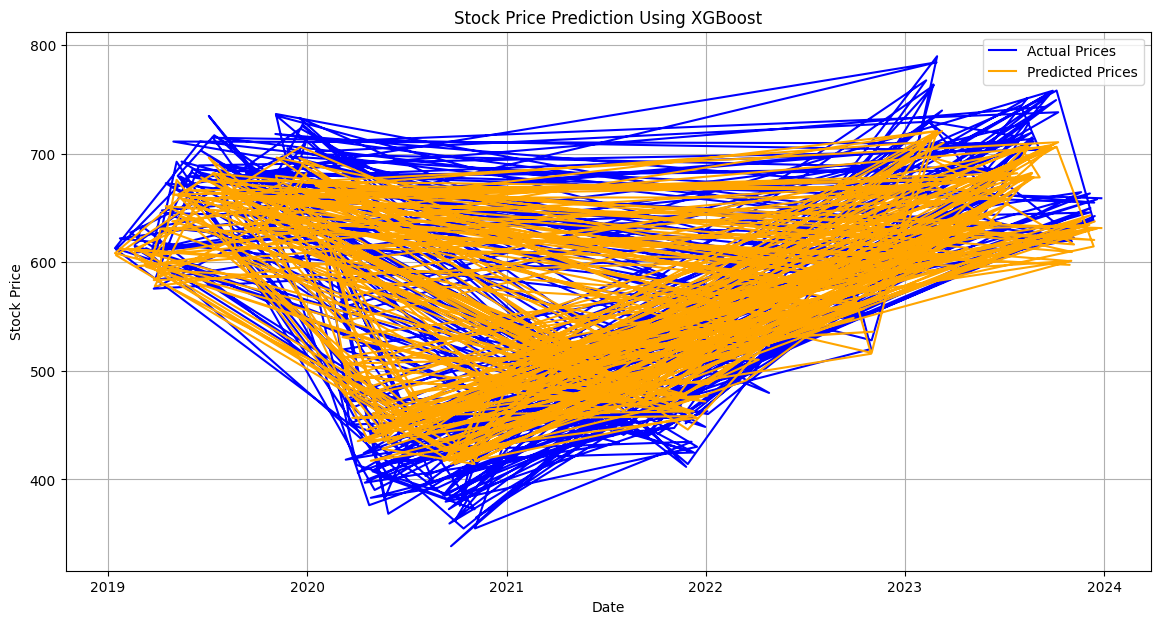

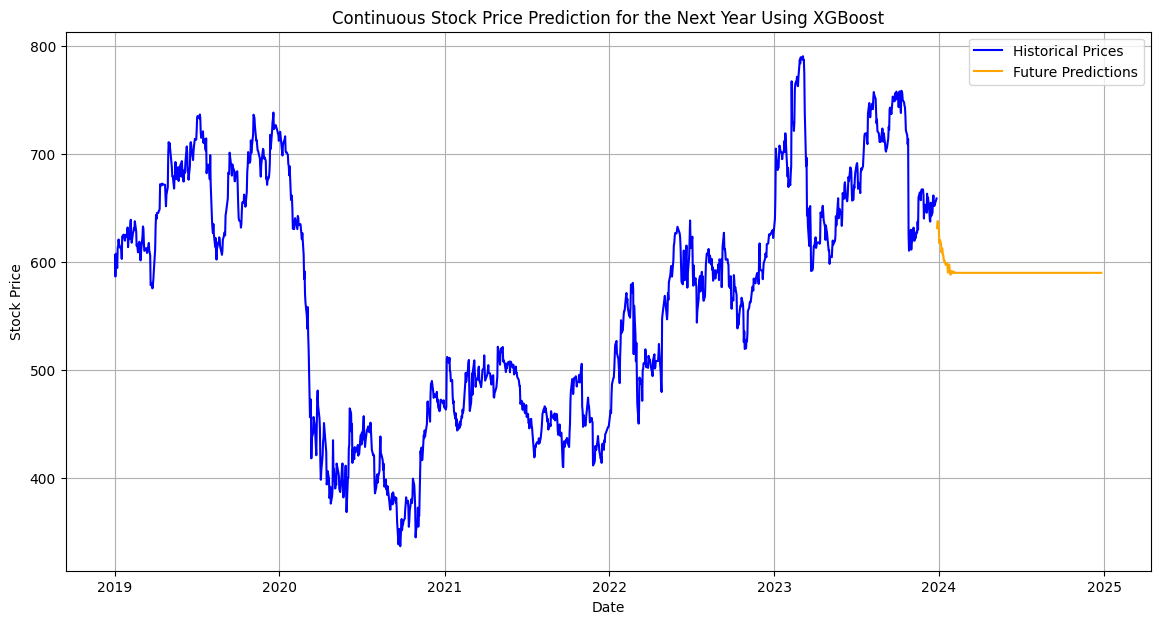

In [104]:

y_pred = xg_model.predict(X_test)

# Plotting actual vs predicted prices
plt.figure(figsize=(14, 7))
plt.plot(y_test.index, y_test, label='Actual Prices', color='blue')
plt.plot(y_test.index, y_pred, label='Predicted Prices', color='orange')

# Adding titles and labels
plt.title('Stock Price Prediction Using XGBoost')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.show()

# Continuous prediction for the next year
# Preparing to create future data for predictions
future_steps = 365

# Creating an array to hold the last observed data points with lag features
last_data = data.iloc[-1][1:].values  # Get the last row of lag features (excluding 'Close')

# Initialize an empty list to store future predictions
future_prices = []

# Generate predictions for the next year
for _ in range(future_steps):
    # Creating a DataFrame for the next prediction with the correct number of lag features
    future_df = pd.DataFrame(data=[last_data], columns=X.columns)

    # Predict the next price
    next_price = xg_model.predict(future_df)[0]
    future_prices.append(next_price)

    # Update last_data for the next iteration
    last_data = np.roll(last_data, -1)  # Shift the lag features to the left
    last_data[-1] = next_price  # Add the predicted price as the last lag feature

# Prepare the index for future dates
last_date = df.index[-1]
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=future_steps)

# Create a DataFrame for future predictions
future_df = pd.DataFrame(data=future_prices, index=future_dates, columns=['Predicted Price'])

# Plotting historical and future predictions
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Close'], label='Historical Prices', color='blue')
plt.plot(future_df.index, future_df['Predicted Price'], label='Future Predictions', color='orange')

# Adding titles and labels
plt.title('Continuous Stock Price Prediction for the Next Year Using XGBoost')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.show()


## SVM

In [93]:

data = df[['Close']].copy()

# Feature Engineering: Create lag features for the closing price
for i in range(1, 6):  # Creating 5 lag features
    data[f'lag_{i}'] = data['Close'].shift(i)

# Dropping missing values
data.dropna(inplace=True)

# Splitting the data into features (X) and target (y)
X = data.drop('Close', axis=1)
y = data['Close']

# Splitting the data into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the SVM model
svm_model = SVR(kernel='rbf')  # You can choose different kernels like 'linear', 'poly', etc.
svm_model.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

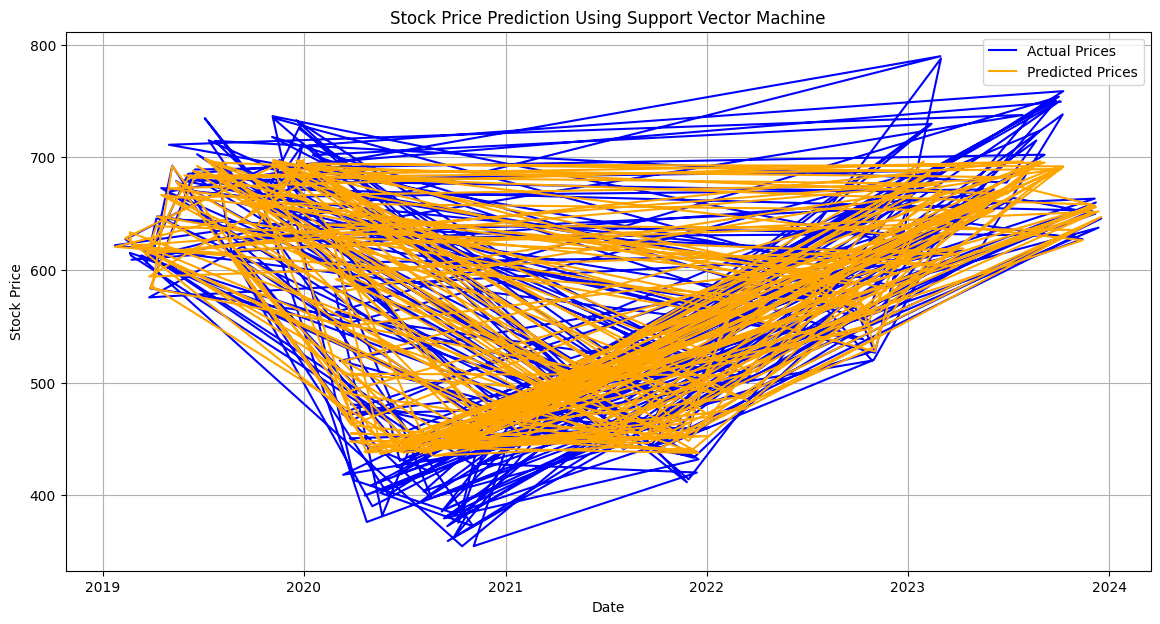

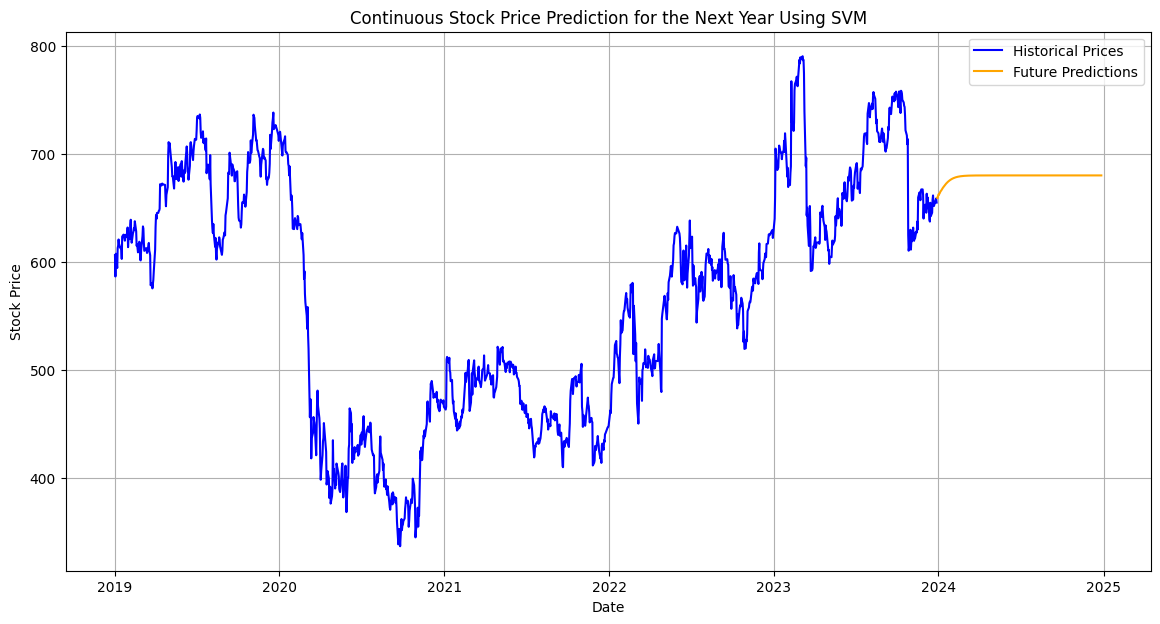

In [94]:

y_pred = svm_model.predict(X_test)

# Plotting actual vs predicted prices
plt.figure(figsize=(14, 7))
plt.plot(y_test.index, y_test, label='Actual Prices', color='blue')
plt.plot(y_test.index, y_pred, label='Predicted Prices', color='orange')

# Adding titles and labels
plt.title('Stock Price Prediction Using Support Vector Machine')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.show()

# Continuous prediction for the next year
# Preparing to create future data for predictions
future_steps = 365

# Creating an array to hold the last observed data points with lag features
last_data = data.iloc[-1][1:].values  # Get the last row of lag features (excluding 'Close')

# Initialize an empty list to store future predictions
future_prices = []

# Generate predictions for the next year
for _ in range(future_steps):
    # Creating a DataFrame for the next prediction with the correct number of lag features
    future_df = pd.DataFrame(data=[last_data], columns=X.columns)

    # Predict the next price
    next_price = svm_model.predict(future_df)[0]
    future_prices.append(next_price)

    # Update last_data for the next iteration
    last_data = np.roll(last_data, -1)  # Shift the lag features to the left
    last_data[-1] = next_price  # Add the predicted price as the last lag feature

# Prepare the index for future dates
last_date = df.index[-1]
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=future_steps)

# Create a DataFrame for future predictions
future_df = pd.DataFrame(data=future_prices, index=future_dates, columns=['Predicted Price'])

# Plotting historical and future predictions
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Close'], label='Historical Prices', color='blue')
plt.plot(future_df.index, future_df['Predicted Price'], label='Future Predictions', color='orange')

# Adding titles and labels
plt.title('Continuous Stock Price Prediction for the Next Year Using SVM')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.show()


**Experiment with hyperparameters**

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


C = 1.0
epsilon = 0.01
kernel = 'rbf'

svm_model = SVR(kernel=kernel, C=C, epsilon=epsilon)
svm_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(epsilon=0.01)

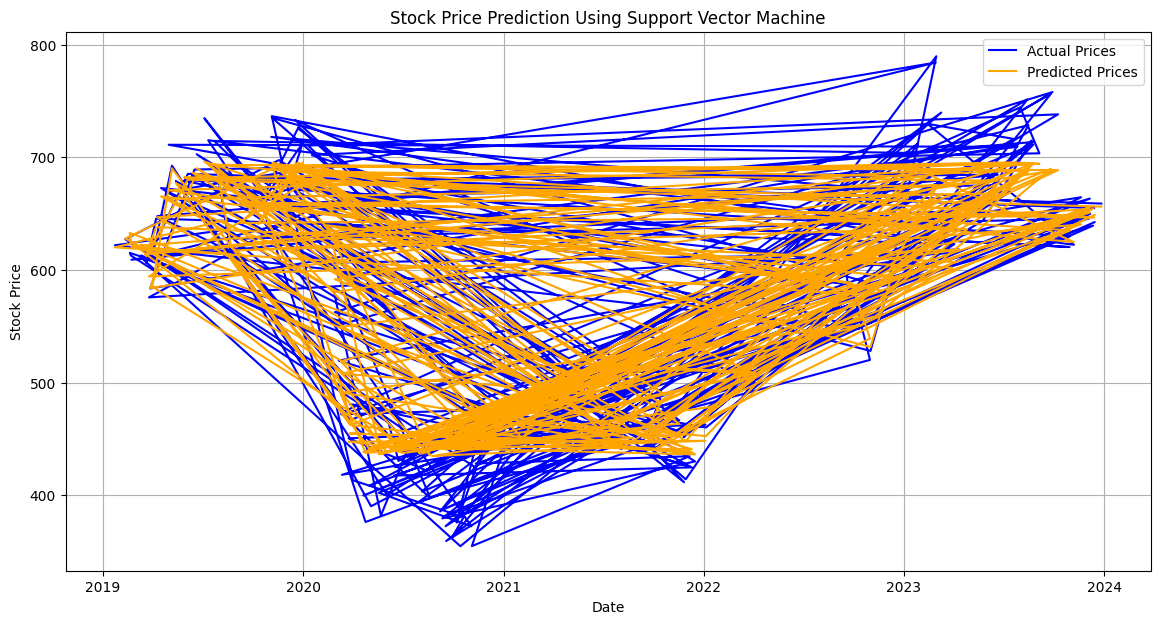

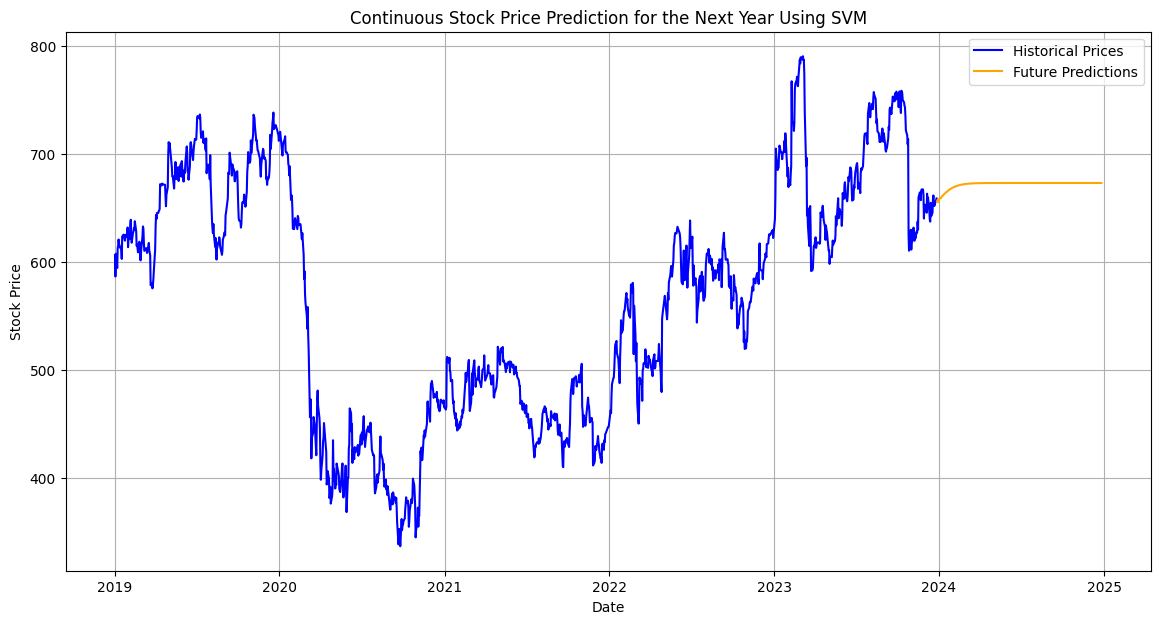

In [107]:

y_pred = svm_model.predict(X_test)

# Plotting actual vs predicted prices
plt.figure(figsize=(14, 7))
plt.plot(y_test.index, y_test, label='Actual Prices', color='blue')
plt.plot(y_test.index, y_pred, label='Predicted Prices', color='orange')

# Adding titles and labels
plt.title('Stock Price Prediction Using Support Vector Machine')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.show()

# Continuous prediction for the next year
# Preparing to create future data for predictions
future_steps = 365

# Creating an array to hold the last observed data points with lag features
last_data = data.iloc[-1][1:].values  # Get the last row of lag features (excluding 'Close')

# Initialize an empty list to store future predictions
future_prices = []

# Generate predictions for the next year
for _ in range(future_steps):
    # Creating a DataFrame for the next prediction with the correct number of lag features
    future_df = pd.DataFrame(data=[last_data], columns=X.columns)

    # Predict the next price
    next_price = svm_model.predict(future_df)[0]
    future_prices.append(next_price)

    # Update last_data for the next iteration
    last_data = np.roll(last_data, -1)  # Shift the lag features to the left
    last_data[-1] = next_price  # Add the predicted price as the last lag feature

# Prepare the index for future dates
last_date = df.index[-1]
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=future_steps)

# Create a DataFrame for future predictions
future_df = pd.DataFrame(data=future_prices, index=future_dates, columns=['Predicted Price'])

# Plotting historical and future predictions
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Close'], label='Historical Prices', color='blue')
plt.plot(future_df.index, future_df['Predicted Price'], label='Future Predictions', color='orange')

# Adding titles and labels
plt.title('Continuous Stock Price Prediction for the Next Year Using SVM')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.show()


## Timeseries Transformer

In [108]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[['Close']])

# Creating sequences for training
def create_sequences(data, seq_length):
    sequences = []
    labels = []
    for i in range(len(data) - seq_length):
        seq = data[i:i + seq_length]
        label = data[i + seq_length]
        sequences.append(seq)
        labels.append(label)
    return torch.FloatTensor(np.array(sequences)), torch.FloatTensor(np.array(labels))  # Convert lists to arrays first

# Set the sequence length
seq_length = 20  # 20 days of closing prices to predict the next day

# Create sequences
X_seq, y_seq = create_sequences(scaled_data, seq_length)

# Split into train and test sets
train_size = int(len(X_seq) * 0.8)
X_train, X_test = X_seq[:train_size], X_seq[train_size:]
y_train, y_test = y_seq[:train_size], y_seq[train_size:]



**Extra code for better isight for data or preprocessing or model**

In [ ]:
# Calculating the number of years
start_year = df.index[0].year
end_year = df.index[-1].year
years_of_data = end_year - start_year + 1

print(f"Years of data: {years_of_data}")


In [ ]:
# Fetching data for Standard Chartered (STAN.L)
ticker = "STAN.L"
stock = yf.Ticker(ticker)

#Stock metadata
metadata = stock.info
metadata


{'address1': '1 Basinghall Avenue',
 'city': 'London',
 'zip': 'EC2V 5DD',
 'country': 'United Kingdom',
 'phone': '44 20 7885 8888',
 'fax': '44 20 7885 9999',
 'website': 'https://www.sc.com',
 'industry': 'Banks - Diversified',
 'industryKey': 'banks-diversified',
 'industryDisp': 'Banks - Diversified',
 'sector': 'Financial Services',
 'sectorKey': 'financial-services',
 'sectorDisp': 'Financial Services',
 'longBusinessSummary': 'Standard Chartered PLC, together with its subsidiaries, provides various banking products and services in Asia, Africa, the Middle East, Europe, and the Americas. The company operates in three segments: Corporate, Commercial & Institutional Banking; Consumer, Private & Business Banking; and Ventures. It offers retail products, such as deposits, mortgages, credit cards, and personal loans; wealth management products and services that include investments, portfolio management, insurance, and wealth advice; and transaction banking services, such as cash mana

In [19]:
# Fetching data for Standard Chartered (STAN.L)
ticker = "STAN.L"
df = yf.download(ticker, start="2019-01-01", end="2024-01-01")

# Ensure 'Date' is set as index in datetime format
df.index = pd.to_datetime(df.index)


[*********************100%***********************]  1 of 1 completed
